Write a simple 2D correlation function on your own. You may use
numpy, but basic math only. Do calculations in float.

**Input:** two grayscale images.

**Output:** *.png file with a correlation image.

In [1]:
from PIL import Image
import numpy as np
import math
import sys
import timeit
import matplotlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 11.0)
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
def normcorr2d(original, template):
    """
    Implements the cross-correlation between the given pixel np arrays.
    
    Arguments:
    original -- (numpy) representing an original image
    template -- (numpy) representing an template image

    Returns:
    c -- the correlation coefficients
    """
    
    t = timeit.Timer() # checking the timing execution speed of small code snippets
    
    assert template.shape < original.shape
    
    template = template - template.mean()

    height_o, width_o = original.shape # get original image height and width 
    height_t, width_t = template.shape # get tamplate image height and width
    
    height_c = height_o+height_t-1
    width_c = width_o+width_t-1
    
    image = np.pad(original, (((height_t-1),
                         (height_t-1)), 
                        ((width_t-1), 
                         (width_t-1))), 
               mode='constant')
    
    c = np.full([height_c, width_c], 0, dtype = float)

    start_time = t.timer()

    for i in range(height_c):
        for j in range(width_c):
            subimage = image[i:i+height_t, j:j+width_t]
            mean = float(np.sum(subimage)/(height_t*width_t))
            subimage = subimage - mean
            normfactor = math.sqrt(np.sum(np.square(subimage))*np.sum(np.square(template)))
            c[i][j] = (np.tensordot(subimage, template, axes = ((0, 1), (0, 1)))) / normfactor
    
    
    #plot
    fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3)
    
    ax_orig.imshow(image, cmap='gray')
    ax_orig.set_title('Original image')
    ax_orig.set_axis_off()
    
    ax_template.imshow(template, cmap='gray')
    ax_template.set_title('Template image')
    ax_template.set_axis_off()
    
    ax_corr.imshow(c, cmap='gray')
    ax_corr.set_title('Cross-correlation')
    ax_corr.set_axis_off()
    
    y, x = np.unravel_index(np.argmax(c), c.shape)
    ax_orig.plot(x+width_t//2, y+height_t//2, 'r+')
    
    rect = matplotlib.patches.Rectangle((x,y),
                                        width_t,
                                        height_t,
                                        linewidth=1,
                                        edgecolor='r',
                                        facecolor='none')
    
    ax_orig.add_patch(rect)
    plt.savefig('correlation_image.png')


    elapsed = round(t.timer() - start_time, 2)
    print(f"   Correlation computed in: {elapsed} seconds")
    print(f"\tMax: {c.max()}\n\tMin: {c.min()}\n\tMean: {c.mean()}")
    return c

In [3]:
def main(im1, im2):
    image1 = Image.open(im1).convert("L")
    image2 = Image.open(im2).convert("L")

    original = np.asarray(image1)
    template = np.asarray(image2)
    
    correlation = normcorr2d(original, template)

   Correlation computed in: 62.17 seconds
	Max: 0.9997466474039256
	Min: -0.5798441255154312
	Mean: -0.02989297328839056


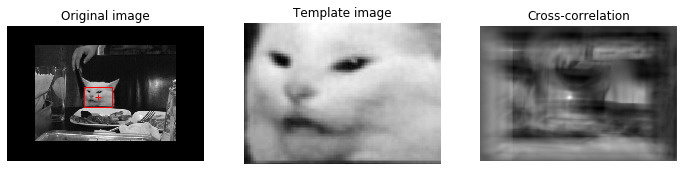

In [4]:
main("images/image1.jpg", "images/image2.jpg")